# Exploratory Data Analysis

EDA contains following steps:
    1. Data understanding
    2. Data cleaning (cleaning missing values, removing redundant columns etc.)
    3. Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
inp2= pd.read_csv("loan.csv")

In [6]:
inp2.purpose.value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

## Data Understanding

In [4]:
inp2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [11]:
inp2.shape

(39717, 111)

## Data Cleaning

In [108]:
# Let's check null values in each columns
inp2.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [13]:
# Let's check percentage of null values in each columns 
round(inp2.isnull().sum()/len(inp2.index),2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [14]:
# There are more columns containing 100% of null values. So we will delete those columns containing more than 90% of null values.
missing_columns = inp2.columns[100*(inp2.isnull().sum()/len(inp2.index))>90]


In [15]:
missing_columns

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [16]:

inp2= inp2.drop(missing_columns, axis=1)

In [17]:
inp2.shape

(39717, 55)

In [18]:
# Again check the data after deletion
100*(inp2.isnull().sum()/len(inp2.index))

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [19]:
# There are two columns desc and mths_since_last_deliq which have more than 30% of null values. So I will delete them
inp2 = inp2.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [20]:
# Again check the dataset to fix columns names, datatypes
inp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [21]:
# Here column 'int_rate' should be int type but it is object. Let's check for the same
inp2[["int_rate"]]

,int_rate
0,10.65%
1,15.27%
2,15.96%
3,13.49%
4,12.69%
...,...
39712,8.07%
39713,10.28%
39714,8.07%
39715,7.43%


In [22]:
# column "int_rate" contains % symbol thats why it is object. We will remove the '%' symbol
inp2["int_rate"]= inp2.int_rate.apply(lambda x: pd.to_numeric(x.split('%')[0]))

In [23]:
# Again check for the datasets info
inp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [24]:
# from above we can see that column 'emp_length' must be int but it is float lets fix it
inp2[['emp_length']]

,emp_length
0,10+ years
1,< 1 year
2,10+ years
3,10+ years
4,1 year
...,...
39712,4 years
39713,3 years
39714,< 1 year
39715,< 1 year


In [25]:
# also, lets extract the numeric part from the variable employment length
# first, let's drop the missing values from the column
inp2 = inp2[~inp2["emp_length"].isnull()]

# using regular expression to extract numeric values from the string
import re
inp2['emp_length'] = inp2['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
inp2['emp_length'] = inp2['emp_length'].apply(lambda x: pd.to_numeric(x))

In [26]:
# check the info 
inp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

In [27]:
# following columns doesn't make sense with the objective of the project and analysing them. So we will delete them.

unwanted_columns =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type",
'title', 'url', 'zip_code', 'addr_state']

In [28]:
# We will drop this columns
df = inp2.drop(unwanted_columns, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

In [29]:
df['loan_status']= df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

Now let's look at target variable 'loan_status'. In this columns most of the column is filled with fully paid. The current means those who not defaulted nor paid off and they are not more so we will get rid of them.

In [30]:
df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [31]:
# filtering only fully paid or charged-off
df= df[df['loan_status'] != 'Current']

In [32]:
# We will insert new category column containing 1 for those who defaulte and 0 for those who paid off the loan. This will be easy while analysing
df['loan_status_Cat'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

In [33]:
# change it to integer
df['loan_status_Cat'] = df['loan_status_Cat'].apply(lambda x: pd.to_numeric(x))

In [34]:
# check the data
df['loan_status_Cat'].value_counts()

0    32145
1     5399
Name: loan_status_Cat, dtype: int64

### Outliers

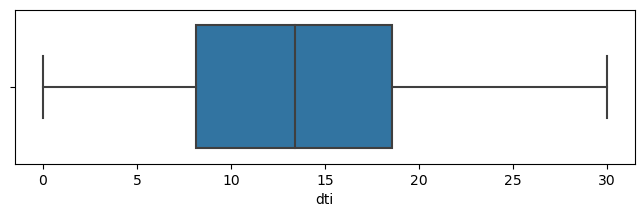

In [35]:
# Let's check the outliers in the dti ratio column 
plt.figure(figsize=[8,2])
sns.boxplot(df.dti)
plt.show()

DTI simply is ratio of debt to be paid monthly to the monthly income of the customer. There are no outliers in the dti column. But we will create new column wich will categorize dti in three options. This will be good for grouping data by dti categories.

In [36]:
# function to apply on every value of dti column which will categoriez values.
def cat_dti(n):
    if n<=10:
        return '0-10'
    elif n>10 and n <=20:
        return '11-20'
    else:
        return '20-30'
    

In [37]:
# let's insert new column
df['dti_category'] = df['dti'].apply(lambda x: cat_dti(x))

In [38]:
# checking form anomalies in grade
df.grade.value_counts()

B    11359
A     9660
C     7669
D     4979
E     2620
F      959
G      298
Name: grade, dtype: int64

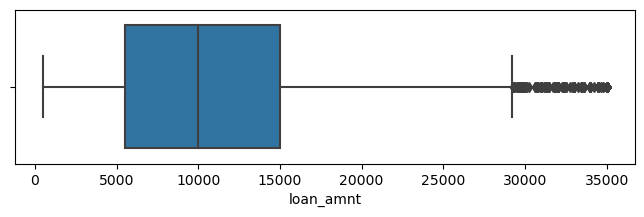

In [39]:
# Let's check outlier's in the loan amonut column
plt.figure(figsize=[8,2])
sns.boxplot(df.loan_amnt)
plt.show()

In loan_amnt column there are customer with more than 30000 loan amount parse from the populated dat but this can't be considered as a outliers so we can bin(categorize) them.

In [40]:
# function to apply on every value of loan_amnt column which will catogoriez values
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'

In [41]:
# let's insert new column for loan amount category
df['loan_amt_category']= df['loan_amnt'].apply(lambda x: loan_amount(x))

In [42]:
# let's check the created column
df['loan_amt_category'].value_counts()

medium       20157
high          7572
low           7095
very high     2720
Name: loan_amt_category, dtype: int64

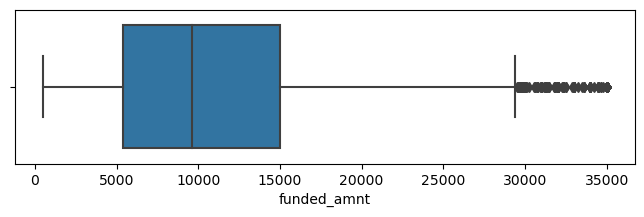

In [43]:
# let's check outliers in the funded_amnt column
plt.figure(figsize=[8,2])
sns.boxplot(df.funded_amnt)
plt.show()

This column contains some values which far from the distrubution which are more than 28000 but this values can't be considered as outliers and cant be deleted so we can bin them. Categoriez them.

In [44]:
# lets create functon which will categories values
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    elif n > 15000 and n <=28000:
        return 'high'
    else:
        return 'very high'
# let's insert new column which will contain catagorical values of funded amount
df['funded_amnt_cat'] = df['funded_amnt'].apply(lambda x: funded_amount(x))

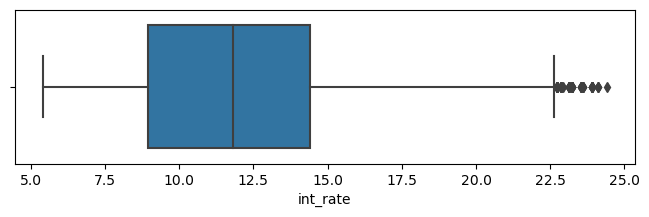

In [45]:
# let's check outliers in the int_rate column
plt.figure(figsize=[8,2])
sns.boxplot(df.int_rate)
plt.show()

This column contains some values which far from the distrubution which are more than 22 but this values can't be considered as outliers and cant be deleted so we can bin them. Categoriez them.

In [46]:
# finction to catagories interest rates
def int_rate(n):
    if n <= 10:
        return '0-10'
    elif n > 10 and n <=15:
        return '11-15'
    elif n > 15 and n <= 20:
        return '16-20'
    else:
        return '21-25'
    
# inserting new column of categorized interest rates    
df['int_rate_cat'] = df['int_rate'].apply(lambda x: int_rate(x))

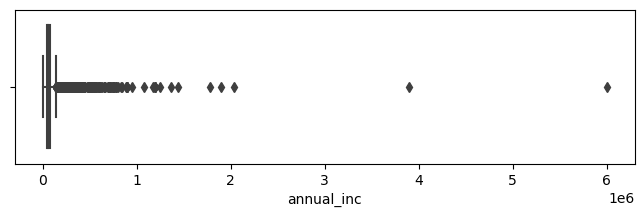

In [47]:
# lets check outliers in the annual income column
plt.figure(figsize=[8,2])
sns.boxplot(df.annual_inc)
plt.show()

From above boxplot we can see that some customers have higher income than the average. We cannot delete these values instead we will categorize them

In [48]:
# function to catagorize annual income column
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

# insert new catogorized column of annual income
df['annual_inc_cat'] = df['annual_inc'].apply(lambda x: annual_income(x))

In [49]:
df[df['annual_inc']>150000].annual_inc

170      225000.0
185      168000.0
331      155000.0
336      208000.0
392      276000.0
           ...   
39692    250000.0
39703    200000.0
39706    180000.0
39707    180000.0
39715    200000.0
Name: annual_inc, Length: 1470, dtype: float64

In [50]:
# check the created column
df['annual_inc_cat'].value_counts()

medium       17433
low          14678
high          3963
very high     1470
Name: annual_inc_cat, dtype: int64

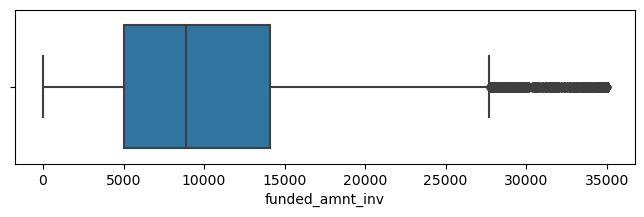

In [51]:
# let's check the funded_amnt_inv column
plt.figure(figsize=[8,2])
sns.boxplot(df.funded_amnt_inv)
plt.show()

From above boxplot we can see that there are outliers but those cant be considered as outliers so we cant delete them instead we can catogorize them

In [52]:
# Creating new column of catagorized funded_amnt_inv and using previously created function to categorize them
df['funded_amnt_inv'] = df['funded_amnt_inv'].apply(lambda x: loan_amount(x))

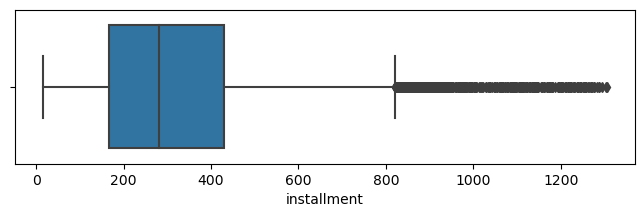

In [53]:
# let's check at installment column 
plt.figure(figsize=[8,2])
sns.boxplot(df.installment)
plt.show()

From above boxplot we can see that there are outliers but those cant be considered as outliers so we cant delete them instead we can catogorize them

In [54]:
# let's create function to categorize installments column 
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'

    # insert new column of categorized installments
df['installment_cat'] = df['installment'].apply(lambda x: installment(x))

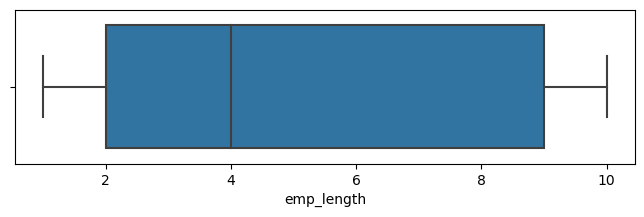

In [55]:
# let's check emp_length column
plt.figure(figsize=[8,2])
sns.boxplot(df.emp_length)
plt.show()

In [56]:
# let's also observe the distribution of loans across years
df[['issue_d']]

,issue_d
0,Dec-11
1,Dec-11
2,Dec-11
3,Dec-11
5,Dec-11
...,...
39712,Jul-07
39713,Jul-07
39714,Jul-07
39715,Jul-07


In [57]:
# first lets convert the year column into datetime and then extract year and month from it
from datetime import datetime
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [58]:
# extracting month from issue_date
df['month'] = df['issue_d'].apply(lambda x: x.month)

In [59]:
# extracting year from issue_date
df['year'] = df['issue_d'].apply(lambda x: x.year)

### Univariate Analysis

In [60]:
# let's check for the dataframe
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,tax_liens,loan_status_Cat,dti_category,loan_amt_category,funded_amnt_cat,int_rate_cat,annual_inc_cat,installment_cat,month,year
0,1077501,1296599,5000,5000,low,36 months,10.65,162.87,B,B2,...,0.0,0,20-30,medium,low,11-15,low,low,12,2011
1,1077430,1314167,2500,2500,low,60 months,15.27,59.83,C,C4,...,0.0,1,0-10,low,low,16-20,low,low,12,2011
2,1077175,1313524,2400,2400,low,36 months,15.96,84.33,C,C5,...,0.0,0,0-10,low,low,16-20,low,low,12,2011
3,1076863,1277178,10000,10000,medium,36 months,13.49,339.31,C,C1,...,0.0,0,11-20,medium,medium,11-15,low,medium,12,2011
5,1075269,1311441,5000,5000,medium,36 months,7.90,156.46,A,A4,...,0.0,0,11-20,medium,low,0-10,low,low,12,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,low,36 months,8.07,78.42,A,A4,...,NaN,0,11-20,low,low,0-10,high,low,7,2007
39713,90665,90607,8500,8500,low,36 months,10.28,275.38,C,C1,...,NaN,0,0-10,medium,medium,11-15,low,medium,7,2007
39714,90395,90390,5000,5000,low,36 months,8.07,156.84,A,A4,...,NaN,0,0-10,medium,low,0-10,medium,low,7,2007
39715,90376,89243,5000,5000,low,36 months,7.43,155.38,A,A2,...,NaN,0,0-10,medium,low,0-10,very high,low,7,2007


In [61]:
#default rate
(round(np.mean(df['loan_status_Cat']), 2))*100

14.000000000000002

Default rate is 14%

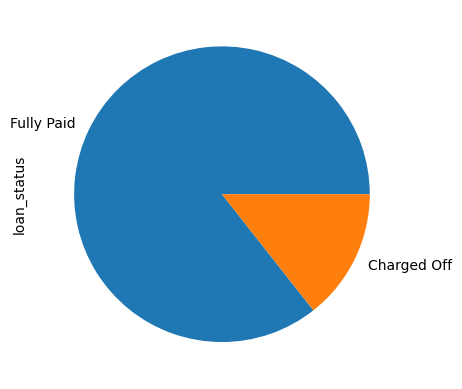

In [62]:
# Graphical representation of people who fully paid or charged off the loan
df['loan_status'].value_counts(normalize=True).plot.pie()
plt.show()

In [63]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          37544 non-null  int64         
 1   member_id                   37544 non-null  int64         
 2   loan_amnt                   37544 non-null  int64         
 3   funded_amnt                 37544 non-null  int64         
 4   funded_amnt_inv             37544 non-null  object        
 5   term                        37544 non-null  object        
 6   int_rate                    37544 non-null  float64       
 7   installment                 37544 non-null  float64       
 8   grade                       37544 non-null  object        
 9   sub_grade                   37544 non-null  object        
 10  emp_title                   36136 non-null  object        
 11  emp_length                  37544 non-null  int64     

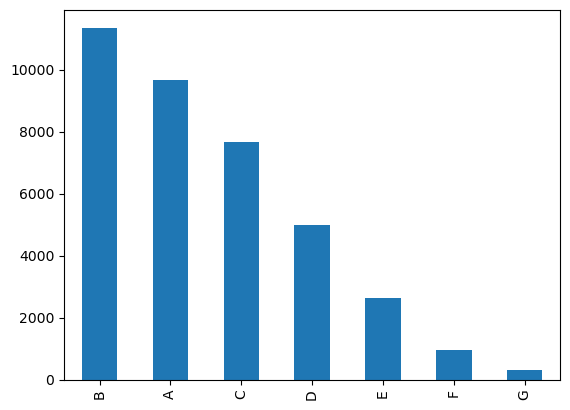

In [64]:
# let's check 'grade' column 
df['grade'].value_counts().plot(kind='bar')
plt.show()

People with grade 'A', 'B', 'C' are more than the other grades

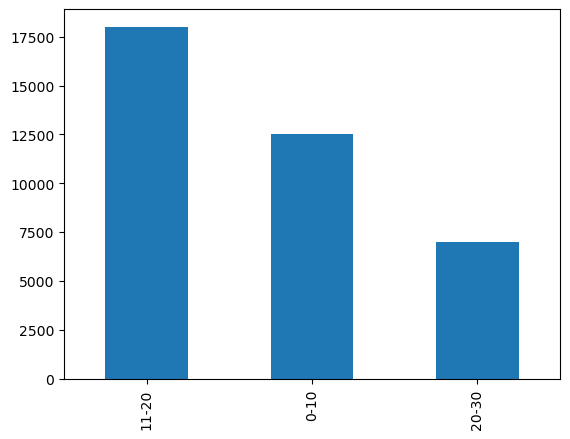

In [65]:
# let's check for 'dti_category' column
df['dti_category'].value_counts().plot.bar()
plt.show()

In [110]:
df.purpose.value_counts()

debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: purpose, dtype: int64

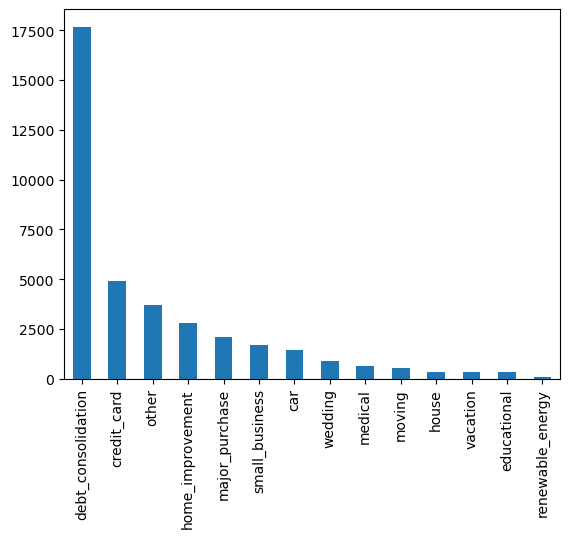

In [66]:
# let's check 'purpose' column
df['purpose'].value_counts().plot(kind='bar')
plt.show()

### Bivariate Analysis

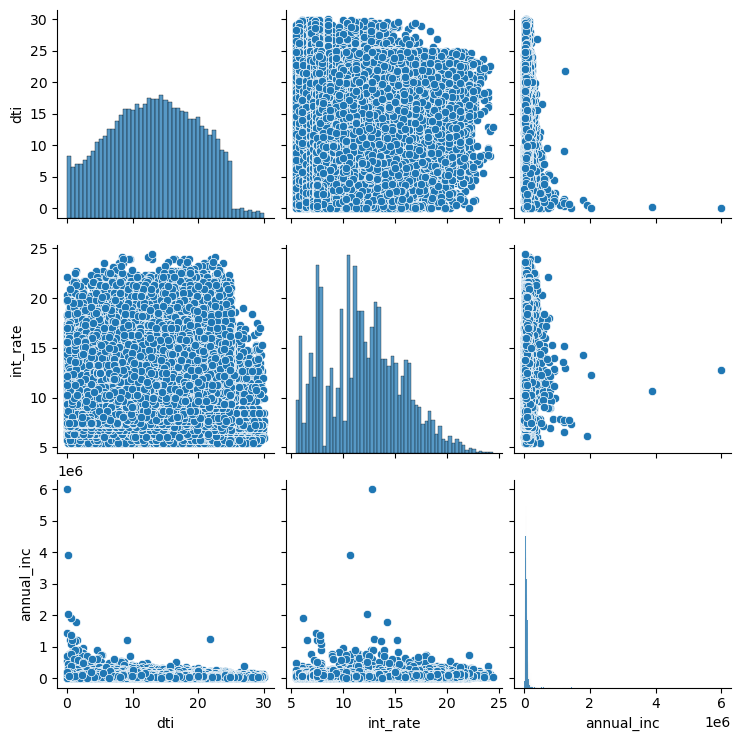

In [67]:
# let's compair 'dti', 'int_rate', 'annual_inc' columns with each other by pairplot
sns.pairplot(data=df, vars=['dti', 'int_rate', 'annual_inc'])
plt.show()

From above graph we can see that there is no strong trend. 

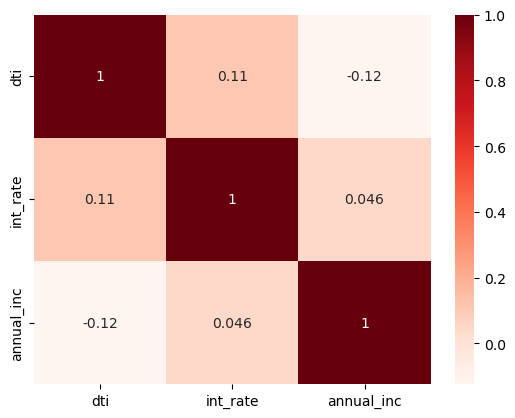

In [68]:
# now let's create correlation matrix for dti, int_rate, annual_inc columns
sns.heatmap(df[['dti', 'int_rate', 'annual_inc']].corr(), annot=True, cmap='Reds')
plt.show()

From the above matrix we can see that there is no strong linear correlation between three variables. But we can see that dti and annual_inc have negative correlation 

### Numerrical categorical analysis

<function matplotlib.pyplot.show(close=None, block=None)>

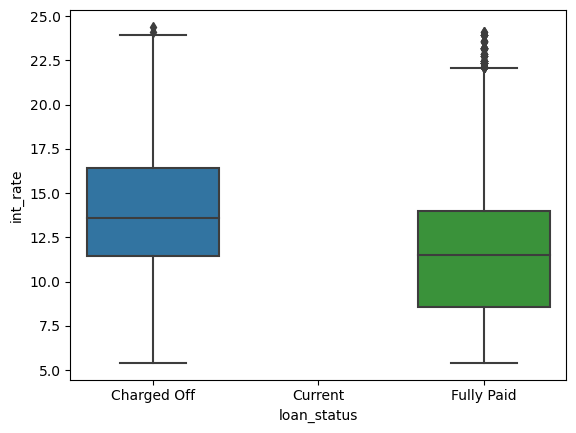

In [69]:
# let's compaire loan_status with the interest rates
sns.boxplot(data=df, x='loan_status', y='int_rate')
plt.show

From above plot we can see that for most of the people who paid fully have median interest rate of 11% and less. Also most of(upto 75 quartiles) the customers fully paid loan have less than 15% of interest rates

<function matplotlib.pyplot.show(close=None, block=None)>

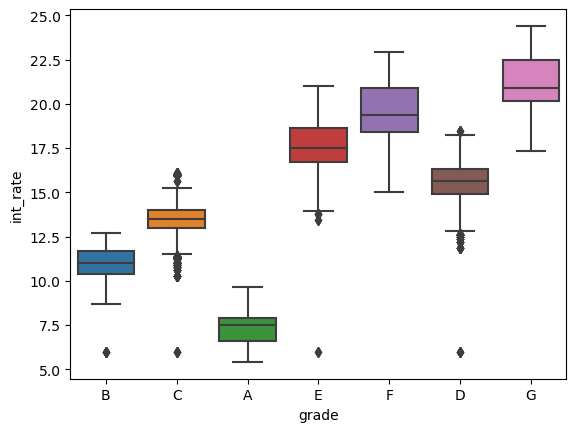

In [70]:
# now let's check grade wise interest rates
sns.boxplot(data=df, x='grade', y='int_rate')
plt.show

We can see that people of grade A have lowest interest rate. As grade decreases interest increases. 

In [71]:
# let's check grade wise mean of dti ratio
df.groupby('grade')['dti'].mean()

grade
A    12.033596
B    13.384540
C    13.879975
D    13.942480
E    14.026943
F    14.240824
G    14.057953
Name: dti, dtype: float64

In [72]:
# let's check grade wise median of dti ratio
df.groupby('grade')['dti'].median()

grade
A    11.500
B    13.500
C    14.080
D    14.240
E    14.395
F    14.700
G    14.730
Name: dti, dtype: float64

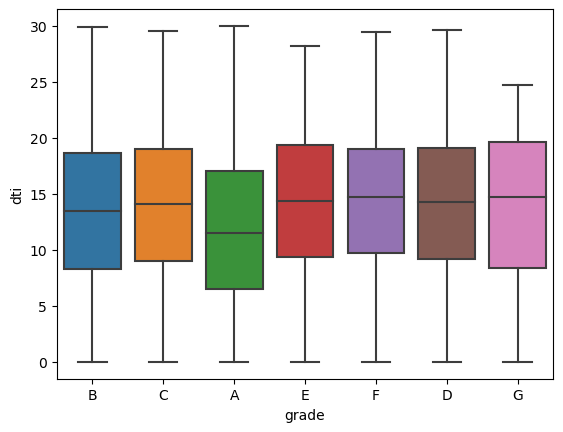

In [73]:
# let'a compair dti ratio with grades
sns.boxplot(data=df, x="grade", y='dti')
plt.show()

Most people of A grade have less dti

### Categorical - Categorical Analysis

In [74]:
# creating function to plot bar graph to check default customers
def plot_graph(cat_var):
    sns.barplot(x=cat_var, y='loan_status_Cat', data=df)
    plt.show()

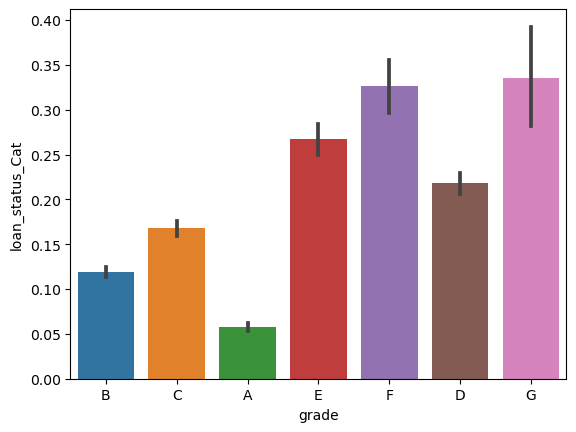

In [75]:
# let's plot barplot to compaire grades with default rate
plot_graph('grade')

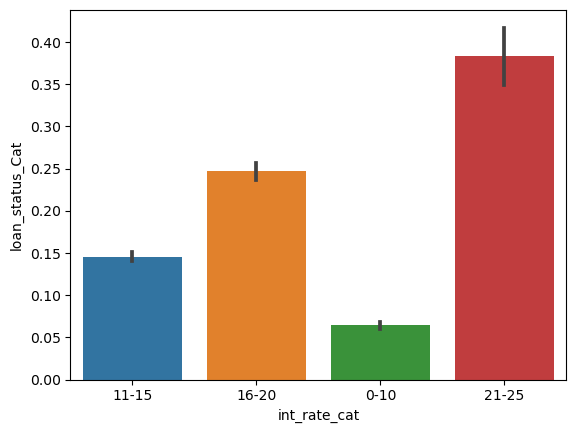

In [76]:
# let's check interest rates with loan status
plot_graph('int_rate_cat')

WE can see that interest of less than 10% have less chances of defual on the other hand interest rate higher than 16% have more chances of loan default

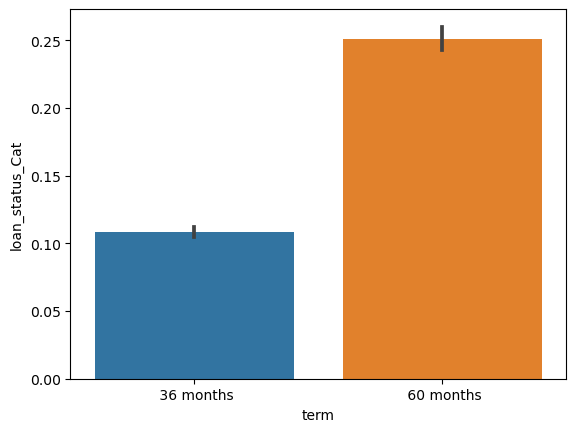

In [77]:
# let's check term with default rates
plot_graph('term')

We can see that 36 months of term for paying loan have much lesser chance of default than the 60 months plan

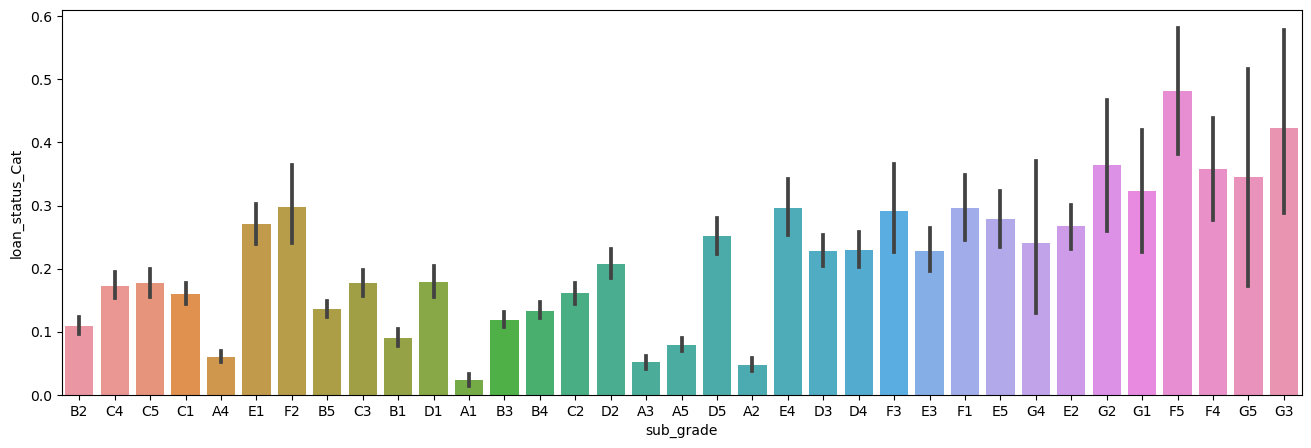

In [78]:
# let's check default rate across sub grades
plt.figure(figsize=(16, 5))
plot_graph('sub_grade')

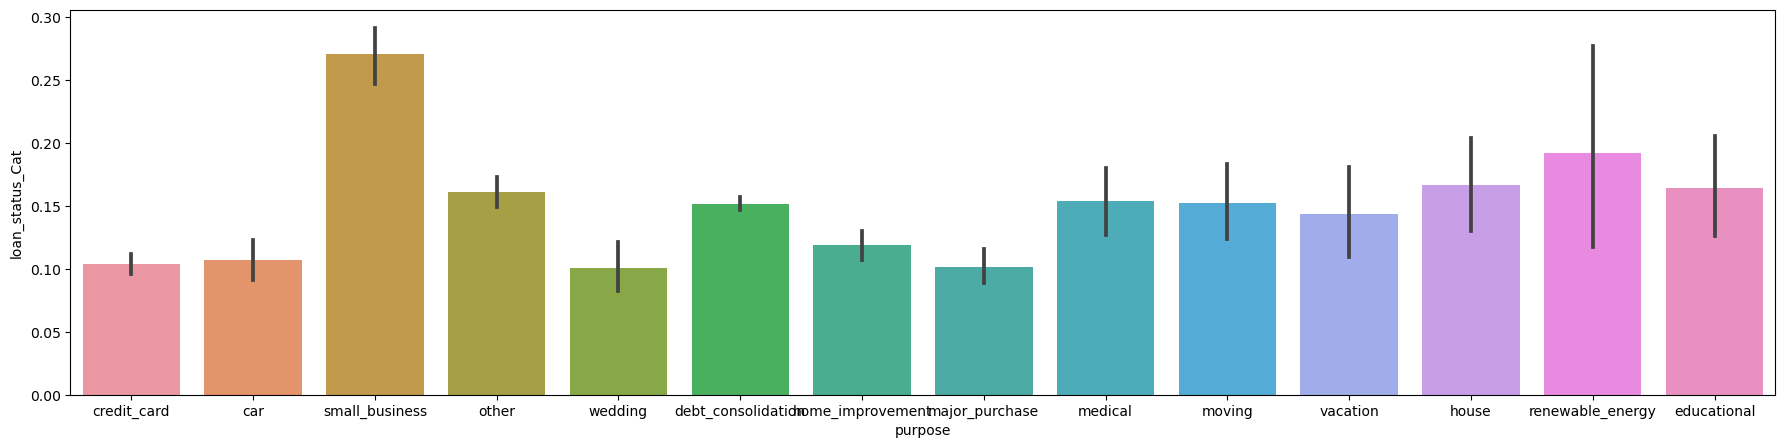

In [81]:
# let's check default rate of the loan across purpose of the loan
plt.figure(figsize=(22, 5))
plot_graph('purpose')

We can se that loan taken for small businesses have more chance of default as followed with debt consolidation, house, renevable energy and other category

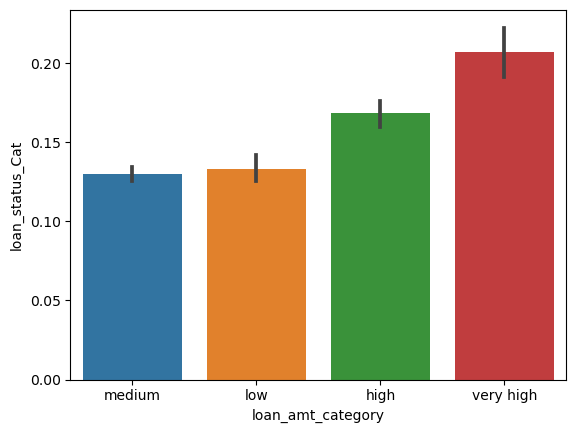

In [82]:
# let's check default rate of the loan across loan amount
plot_graph('loan_amt_category')

People with high and very high category of loan amount are more likely to default rate.

### Multivariate Analysis

In [83]:
# let's perform three variable analysis between annual income, dti and default rate to compair default rate with dti groups based on annual income
res = pd.pivot_table(data=df, index="annual_inc_cat", columns="dti_category", values="loan_status_Cat")


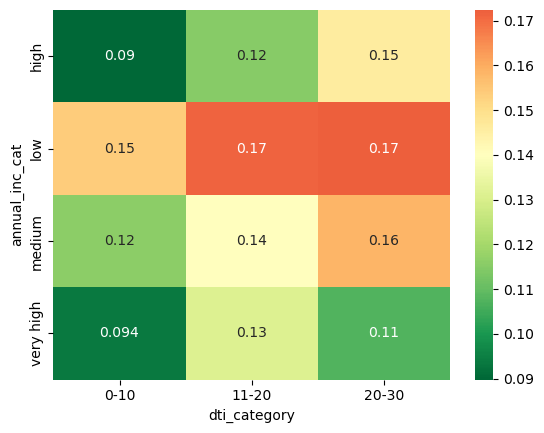

In [84]:
sns.heatmap(res, annot=True, cmap="RdYlGn_r", center=0.14)
plt.show()

We can see that people with dti between 0-10 and all categories of income except low category of incom are less likely to default. People with high dti and low income can default loans. 

In [85]:
# let's perform three variable analysis between annual grade, dti and default rate so that we can compaire default rate with grade wise dti
rest = pd.pivot_table(data=df, index="grade", columns="dti_category", values="loan_status_Cat")

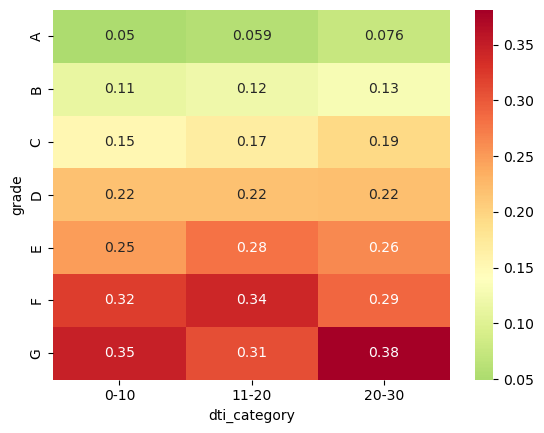

In [86]:
sns.heatmap(rest, annot=True, cmap="RdYlGn_r", center=0.14)
plt.show()

From above heatmap we see that people with grade 'A' and 'B' with low dti are less likely to default. People with grade 'C' with low dti can be targeted. People with grade 

In [87]:
# let's perform three variable analysis between sub_grade, dti and default rate so that we can compaire default rate with sub_grade wise dti so that We can see people from low grade with high dti and low dti with high grade   
res = pd.pivot_table(data=df, index="sub_grade", columns="dti_category", values="loan_status_Cat")


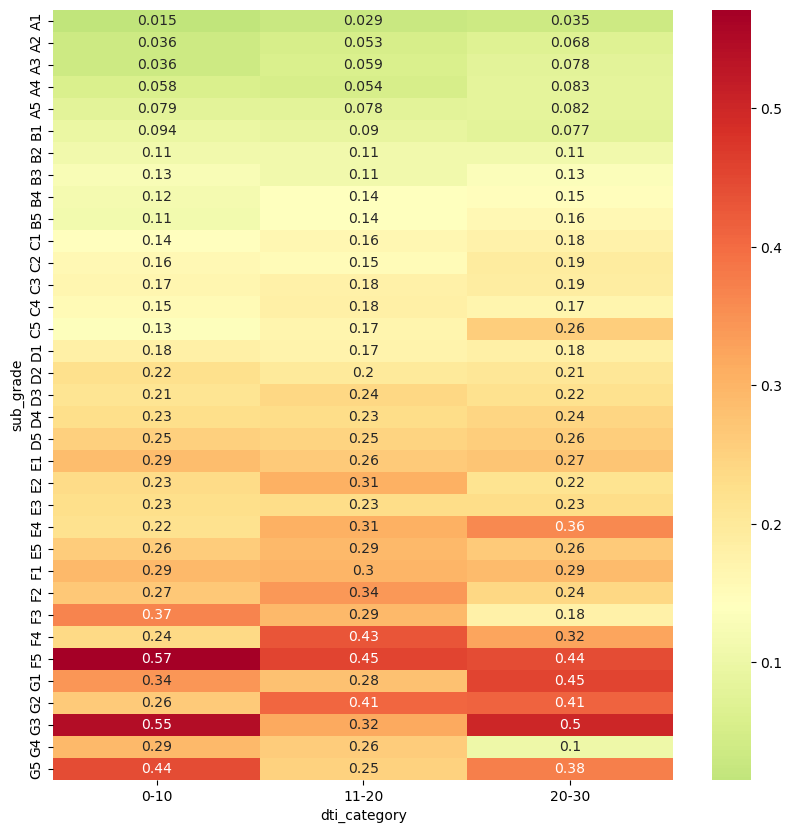

In [89]:
plt.figure(figsize=[10,10])
sns.heatmap(res, annot=True, cmap="RdYlGn_r", center=0.14)
plt.show()

Let's perform three variable analysis between purpose, dti and default rate so that we can compaire default rate with different purposes for the loan with dti of customers. By this we can exclude people who want loan for perticular business and has low dti and also we can give loans to people with high dti but want loan that can be paid off. 

In [90]:

res = pd.pivot_table(data=df, index="purpose", columns="dti_category", values="loan_status_Cat")


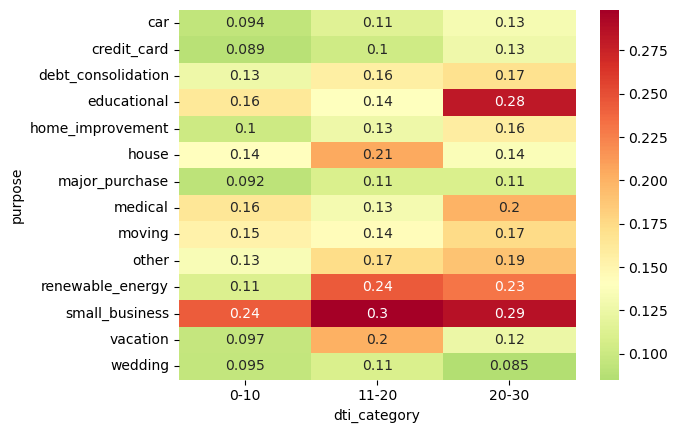

In [91]:
sns.heatmap(res, annot=True, cmap="RdYlGn_r", center=0.14)
plt.show()

Wedding loan, vacation loan, car loan, credit card loan can be given to people with high dti

Let's perform three variable analysis between interest rate, annual income and default rate so that we can compaire default rate of people with people having different income levels and different interest on loans. So that we can avoid customers giving loans have high interest rates and people have low income levels.

In [92]:
res = pd.pivot_table(data=df, index="int_rate_cat", columns="annual_inc_cat", values="loan_status_Cat")


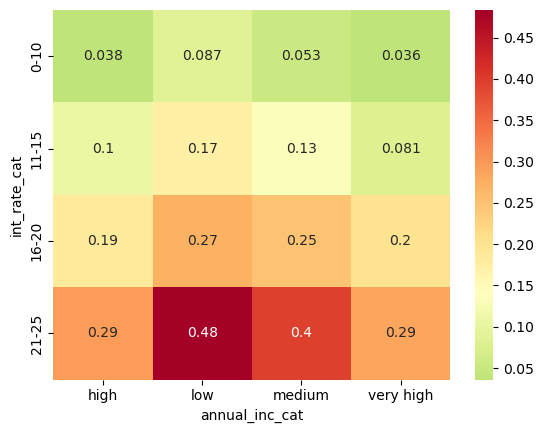

In [93]:
sns.heatmap(res, annot=True, cmap="RdYlGn_r", center=0.14)
plt.show()

Let's perform three variable analysis between loan amount, dti and default rate so that we can compaire default rate with loan amounts given to people with different dti, so that we can avoid giving high amounts of loan to people having medium or high dti

In [94]:
res = pd.pivot_table(data=df, index="loan_amt_category", columns="dti_category", values="loan_status_Cat")

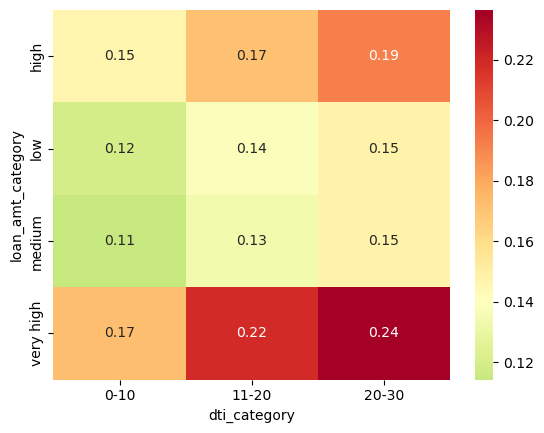

In [95]:
sns.heatmap(res, annot=True, cmap="RdYlGn_r", center=0.14)
plt.show()